<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

## My understanding 

Principal Component Analysis (PCA) takes high-dimensional data and projects it into lower dimensional data. It does this by maximising the variance of the basis vector it projects on. This can be done by projecting the eigenvalues of the covariance matrix $Cov(\mathbf{A})$ data $\mathbf{A}$, from largest to smallest. To avoid all principal components being slight variations of the first, PCA constraints each principal component to be orthoganal the others. 

## Wikipedia 

The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i-1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In data analysis, the first principal component of a set of $p$ variables, presumed to be jointly normally distributed, is the derived variable formed as a linear combination of the original variables that explains the most variance. The second principal component explains the most variance in what is left once the effect of the first component is removed, and we may proceed through $p$ iterations until all the variance is explained. PCA is most commonly used when many of the variables are highly correlated with each other and it is desirable to reduce their number to an independent set.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i$-th principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

For either objective, it can be shown that the principal components are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix. PCA is the simplest of the true eigenvector-based multivariate analyses and is closely related to factor analysis.

[Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis#:~:text=Principal%20component%20analysis%20(PCA)%20is,components%20and%20ignoring%20the%20rest)

## Terms 

A glossary of terms is given from (Goodfellow 2016). 

| Term | Symbol  | Description | 
| ---  | --- | --- |
| Covariance | $ Cov(\mathbf{A}) $ | The covariances gives some sense of how much two variables are linearly related to each other, as well as the scale of these variables: <br> $ Cov(f(x), g(y)) = \mathbb{E} [(f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])] $ | 
| Covariance Matrix | $Cov(\mathbf{A})$ | The covariance matrix of a random vector $x \in \mathbb{R}^n$ is an $n \times n$ matrix, such that $ Cov(x)_{i,j} = Cov(x_i,x_j) $.<br>The diagnal elements of the covariances give the variance. <br> $Cov(x)_{i,i} = Var(x_i)$. | 
| Eigenvectors | $\mathbf{A}v = \lambda v$  | The eigenvector is a square matrix $\mathbf{A}$ is a nonzero vector $\mathbf{v}$ such that mulitplication by $\mathbf{A}$ alters only the scale. | 
| Eigen decomposition | $ \mathbf{A} = \mathbf{Q \Lambda  Q ^ \top}$ | Real symmetric matrices can be decomposed into an expression using only real-valued eigenvalues and eigienvectors.<br> where $Q$ is an orthogonal matrix composed of eigenvectors of $\mathbf{A}$, and $\Lambda$ is a diagonal matrix.<br>The eigevalue $\Lambda_{i,i}$ is associated with the eignvector in column $i$ of $Q$ denoted as $Q_{:,i}$.<br>Becayse $Q$ is an orthongal matrix, we can think of $\mathbf{A}$ as scaling space by $\lambda_i$ in direction $v^{(i)}$ | 
| Expected Value | $\mathbb{E}$ | The expectation, or expected value, of some function $f(x)$ with respect to a probability distribution $P(x)$ is the average, or mean value, that $f$ takes on when $x$ is drawn from $P$.<br>For discrete vaiables this can be computed with a summation: <br> $ \mathbb{E}_{x \sim p}[f(x)] = \sum_x P(x)f(x) $ |
| $L^2$ Norm | $ \|x\|_2 $ | Is the Euclidean norm, which is simply the Euclidiean distance from the origin to the point identified as $x$. | 
| Orthonormal | | If vectors, not only are orthogonal, but also have unit norm, they are **orthonormal** |  
| Orthogonal | $x^\top y = 0$ | A vector $x$ and a vector $y$ are orthoogonal to eachother if $x^\top y = 0$. If both vectors have non-zero norm, they are 90$^{\circ}$ from eachother. |
| Square Matrix | $\mathbf{A} \in \mathbb{R}^{n \times n} $ | A square matrix is a matrix with the same number of rows and columns. | 
| Squared $L^2$ Norm | $ \|x\|_2^2 $ | The square $L^2$ is a more convienent form to work with computationally. |  
| Symmetric | $\mathbf{A}^\top = \mathbf{A}$ | A symmetric matrix is any matrix that is equal to its own transpose: $\mathbf{A}^\top = \mathbf{A}$<br>Note, any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances. |
| Unit Norm | $ \|x\|_2=1$ | A unit vector is a vector with unit norm | 

## References 

1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

Text(0, 0.5, 'y')

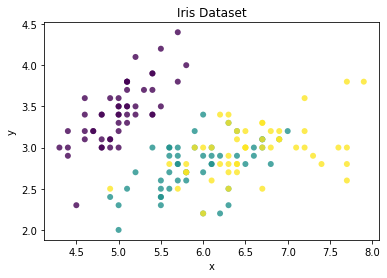

In [13]:
import matplotlib.pyplot as plt 
from sklearn import datasets 

data = datasets.load_iris() 
X = data.data 
y = data.target 

x1 = X[:, 0]
x2 = X[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.title("Iris Dataset")
plt.xlabel("x")
plt.ylabel("y")

First eigenvector [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


Text(0, 0.5, 'Principal Component 2')

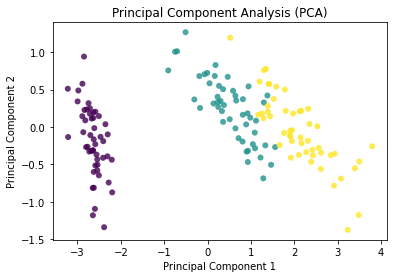

In [15]:
import numpy as np

class PCA: 
    def __init__(self, n_components):
        """
        Args: 
            n_componets: The number of principal components. 
        """
        self.n_components = n_components
        self.components = None 
        self.mean = None 

    def fit(self, X):
        """Calculate the principal components.
        
        Args:
            X: the original dataset to be fitted. 
        """

        # Mean centering. 
        self.mean = np.mean(X, axis=0)
        X = X - self.mean 

        # Covraiance, function needs samples as columns. 
        cov = np.cov(X.T)

        # Eigenvalues, Eigenvectors for the covariance matrix. 
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector is column vector: v = [:,i]
        # transpose for easier calculations. 
        eigenvectors = eigenvectors.T 
        
        # sort eigenvectors, convention to sort descending (Goodfellow 2016).
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        print(f"First eigenvector {eigenvectors[0]}")

        # store first N eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        """Project the data
        
        Args: 
            X: The original data. 
        
        Returns:
            projection: The dataset projected into its principal components. 
        """

        # Mean centering 
        X = X - self.mean 
        # Project the data into principal componets. 
        projection = np.dot(X, self.components.T)
        return projection

# Project the data onto the 2 primary principal components 
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2 , c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.title("Principal Component Analysis (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

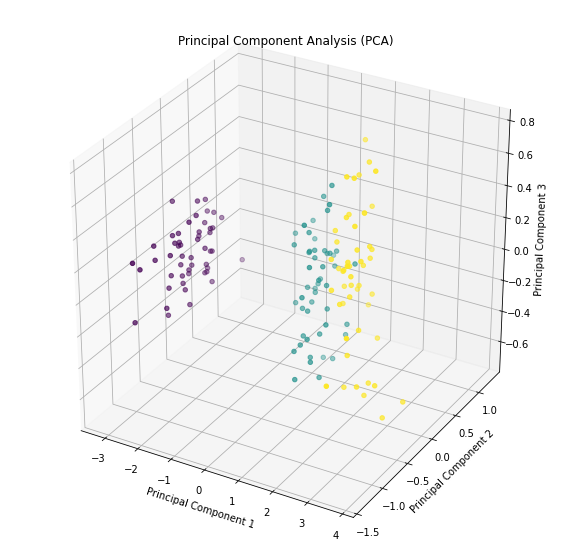

In [12]:
# Project the data onto the 3 primary principal components 
pca = PCA(3)
pca.fit(X)
X_projected = pca.transform(X)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating 3D scatter plot
ax.scatter3D(x1, x2, x3, c=y)

plt.title("Principal Component Analysis (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

In [18]:
v = np.array([[1,2,3],[1,2,3],[1,2,3]])
i = 0
v[:,i]

array([1, 1, 1])